# Our first machine learning model: Logistic Regression

In [7]:
# Import our libraries 
import numpy as np 
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [3]:

file_path = '/Users/zahavalowy/my-fork-2024-DS-Tue/Week-06-Classification/data/titanic.csv'

titanic_df = pd.read_csv(file_path)
print(titanic_df.head())

   passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [4]:
# Identify which columns have null values. 
null_counts = titanic_df.isnull().sum()
null_percentage = (null_counts / len(titanic_df)) * 100
null_data = pd.DataFrame({
    'Null Count': null_counts,
    'Missing Percentage (%)': null_percentage
})
columns_with_nulls = null_data[null_data['Null Count'] > 0]

print("Columns with null values:")
print(columns_with_nulls)


Columns with null values:
          Null Count  Missing Percentage (%)
age              177               19.865320
cabin            687               77.104377
embarked           2                0.224467


# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [6]:
titanic_df_no_duplicates = titanic_df.drop_duplicates()

# Use sns.pariplot to visualize.
* Set the hue='survived'.

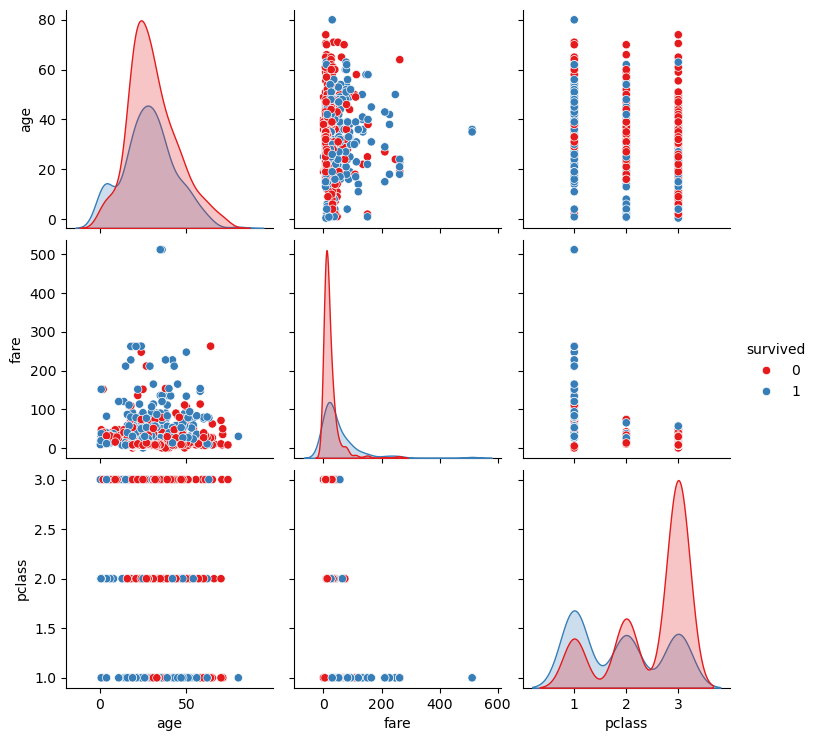

In [11]:
selected_columns = ['age', 'fare', 'pclass', 'survived']
titanic_df_clean = titanic_df[selected_columns].dropna()
sns.pairplot(titanic_df_clean, hue='survived', palette='Set1')
plt.show()

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [12]:
from sklearn.model_selection import train_test_split


titanic_df = pd.get_dummies(titanic_df, columns=['sex'], drop_first=True)  
selected_features = ['fare', 'sex_male']

X = titanic_df[selected_features]
y = titanic_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (668, 2)
X_test shape: (223, 2)
y_train shape: (668,)
y_test shape: (223,)


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [13]:
# Select our features
selected_features = ['fare', 'sex_male']

# Set X to be the features we are going to use.
X = titanic_df[selected_features]

# Set y to be our target variable. 
y = titanic_df['survived']

# Split our data into the testing and training groups. 

In [14]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(668, 2) (223, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [15]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize the Logistic Regression model
model = LogisticRegression()

# Step 2: Train the model using the training data
model.fit(X_train, y_train)

# Step 3: Predict the values of your testing data
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)




Predicted values: [0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0]


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

Accuracy: 0.8116591928251121
Precision: 0.7195121951219512
Recall: 0.7564102564102564
F1 Score: 0.7375
True Positives: 59
True Negatives: 122


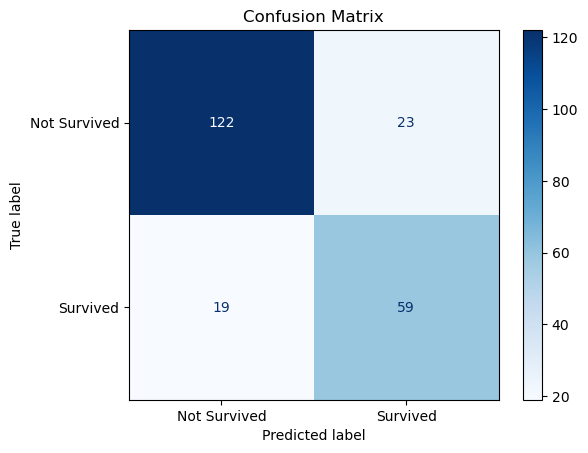

In [18]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Make predictions on your test data
y_pred = model.predict(X_test)

# Step 2: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 3: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)

# Display True Positives and True Negatives
true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
print("True Positives:", true_positive)
print("True Negatives:", true_negative)

# Show the confusion matrix plot
plt.title("Confusion Matrix")
plt.show()



In [19]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)


Accuracy Score: 0.811659
Precision Score: 0.719512
Recall Score: 0.756410
F1 Score: 0.737500


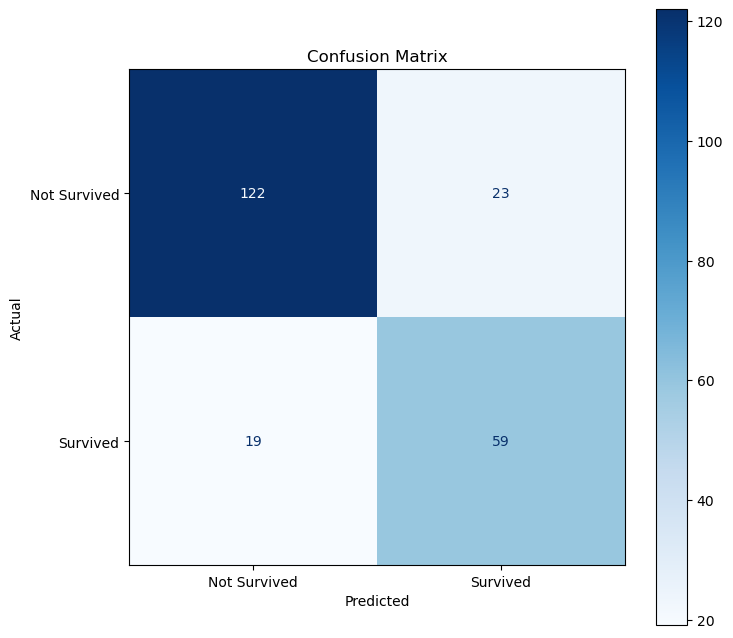

In [20]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(ax=ax, cmap=plt.cm.Blues)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [21]:
# Extract True Positives and True Negatives from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the results
print(f'True Negatives: {tn}')
print(f'True Positives: {tp}')


True Negatives: 122
True Positives: 59


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

Accuracy Score: 0.820896
Precision Score: 0.718750
Recall Score: 0.766667
F1 Score: 0.741935


<Figure size 800x800 with 0 Axes>

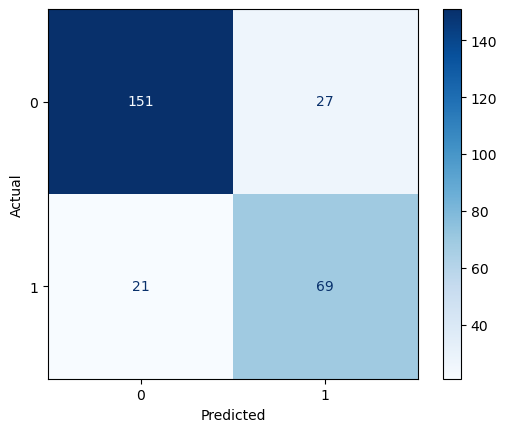

In [24]:
# 1. Load the titanic dataset
df = pd.read_csv('data/titanic.csv')

# 2. Use pd.get_dummies to one-hot encode 'pclass', 'embarked', and 'sex'
df = pd.get_dummies(df, columns=['pclass', 'embarked', 'sex'], drop_first=True)

# 3. Update the selected features to include the new pclass, embarked, and sex columns
selected_features = ['fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S']

# 4. Define X and y variables
X = df[selected_features]
y = df['survived']

# 5. Split the data into training and testing sets (use the same random state as before)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# 6. Initialize Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()

# 7. Fit the model using training data
model_2.fit(X_train, y_train)

# 8. Make predictions using the test data
y_pred_2 = model_2.predict(X_test)

# 9. Calculate accuracy, precision, recall, and F1 scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)

# Print the scores
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print("F1 Score: %f" % f1_2)

# 10. Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm_2 = confusion_matrix(y_test, y_pred_2)
fig = plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




# EXTRA CREDIT 1. 
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [ ]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.


# Fill null age values with mean age.


# Create new traveled_alone feature


# Update your `selected_features` to include the new traveled alone and age


# Define your X and y variables


# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.

# Make new predicitions using our testing data. 


# Calculate our accuracy
accuracy_3 = 

# Calculate our precision score
precision_3 = 

# Calculate our recall score
recall_3 = 

# Calculate your f1-score
f1_3 = 

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual');

# EXTRA CREDIT 2:  

Use stats models to create a summary report.  Interpret the results. 